# SD212: Graph mining
## Lab 5: Hierarchical clustering

In this lab, you will learn to analyse the hierarchical structure of a graph. 

## Import

In [1]:
from IPython.display import SVG

In [2]:
import numpy as np
from scipy import sparse

In [3]:
from sknetwork.data import load_netset, karate_club
from sknetwork.hierarchy import LouvainHierarchy, BiLouvainHierarchy, Paris, BiParis, cut_straight
from sknetwork.ranking import PageRank, BiPageRank, top_k
from sknetwork.linalg import normalize
from sknetwork.utils import membership_matrix
from sknetwork.visualization import svg_graph, svg_digraph, svg_dendrogram

## Data

We will work on the following graphs (see the [NetSet](https://netset.telecom-paris.fr/) collection for details):
* Openflights (graph)
* WikiVitals (digraph)
* Cinema (bigraph)

In [47]:
openflights = load_netset('openflights')
wikivitals = load_netset('wikivitals')
cinema = load_netset('cinema')

Parsing files...
Done.
Parsing files...
Done.
Parsing files...
Done.


## 1. Graphs

## Karate Club


The [karate club graph](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) provides ground-truth clusters.

In [535]:
graph = karate_club(True)

In [536]:
adjacency = graph.adjacency
position = graph.position
labels_true = graph.labels

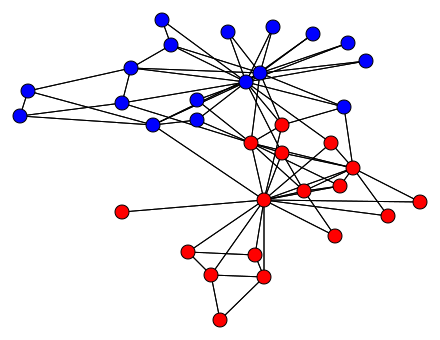

In [537]:
image = svg_graph(adjacency, position, labels=labels_true)
SVG(image)

## To do - Divisive Algorithm

* Cluster the graph by the hierarchical Louvain algorithm.
* Display the dendrogram.
* How many clusters are there at depth 2?

In [538]:
louvain = LouvainHierarchy() #depth=2)

In [539]:
dendrogram = louvain.fit_transform(adjacency)

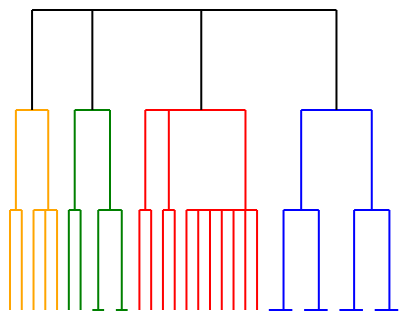

In [540]:
image = svg_dendrogram(dendrogram)
SVG(image)

In [541]:
n = adjacency.shape[0]
dendrogram[dendrogram[:,2] == 3][:,3], n

(array([11., 12., 13.]), 34)

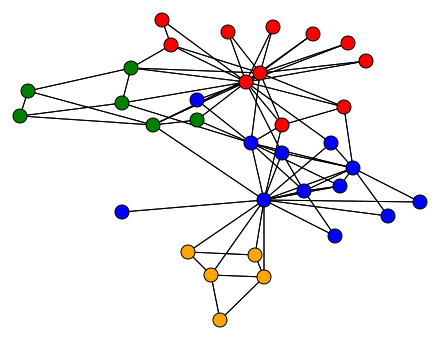

In [542]:
labels = cut_straight(dendrogram, n_clusters=3)

image = svg_graph(adjacency, position, labels=labels)
SVG(image)

###### For a depth cut of 2:

**Note** : We had to change Louvain's resolution to 0.6, because with resolution at 1, the first Louvain was giving a 4-clusters clustering. Hence, increasing the fit ( by lowering the resolution ), we initially get just 2 clusters:

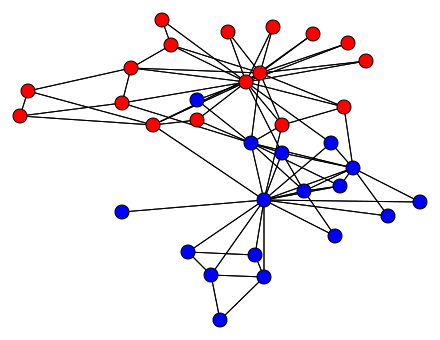

In [543]:
louvain = LouvainHierarchy(depth=4, resolution=0.6)
dendrogram = louvain.fit_transform(adjacency)
labels = cut_straight(dendrogram, n_clusters=2)

image = svg_graph(adjacency, position, labels=labels)
SVG(image)

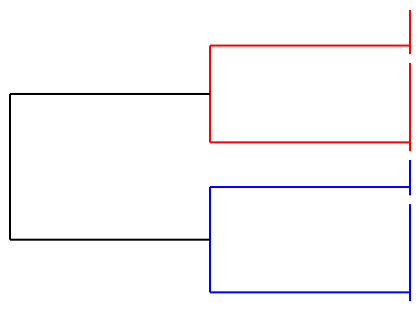

In [544]:
image = svg_dendrogram(dendrogram, rotate=True, width=400)
SVG(image)

In [545]:
dendrogram

array([[16., 10.,  0.,  2.],
       [21., 19.,  0.,  2.],
       [31., 28.,  0.,  2.],
       [33., 32.,  0.,  2.],
       [35., 17.,  0.,  3.],
       [38., 13.,  0.,  4.],
       [39., 12.,  0.,  5.],
       [40., 11.,  0.,  6.],
       [41.,  9.,  0.,  7.],
       [42.,  7.,  0.,  8.],
       [43.,  3.,  0.,  9.],
       [44.,  2.,  0., 10.],
       [45.,  1.,  0., 11.],
       [46.,  0.,  0., 12.],
       [34.,  6.,  0.,  3.],
       [48.,  5.,  0.,  4.],
       [49.,  4.,  0.,  5.],
       [37., 30.,  0.,  3.],
       [51., 29.,  0.,  4.],
       [52., 26.,  0.,  5.],
       [53., 22.,  0.,  6.],
       [54., 20.,  0.,  7.],
       [55., 18.,  0.,  8.],
       [56., 15.,  0.,  9.],
       [57., 14.,  0., 10.],
       [58.,  8.,  0., 11.],
       [36., 27.,  0.,  3.],
       [60., 25.,  0.,  4.],
       [61., 24.,  0.,  5.],
       [62., 23.,  0.,  6.],
       [50., 47.,  1., 17.],
       [63., 59.,  1., 17.],
       [65., 64.,  2., 34.]])

## To do - Paris Algorithm (agglomerative)

* Cluster the graph by the Paris algorithm.
* Display the dendrogram.
* Display the graph with the top-2 clusters. How many nodes are misclassified compared to the ground truth?
* Display the graph with the top-4 clusters and the corresponding aggregate dendrogram.

**Hint:** Check the parameters of the function ``cut_straight``.

In [555]:
paris = Paris()

In [556]:
dendrogram = paris.fit_transform(adjacency)

In [557]:
dendrogram

array([[1.60000000e+01, 5.00000000e+00, 2.56410256e-02, 2.00000000e+00],
       [2.90000000e+01, 2.60000000e+01, 2.56410256e-02, 2.00000000e+00],
       [1.00000000e+01, 4.00000000e+00, 2.88461528e-02, 2.00000000e+00],
       [2.50000000e+01, 2.40000000e+01, 2.88461528e-02, 2.00000000e+00],
       [1.20000000e+01, 3.00000000e+00, 3.84615385e-02, 2.00000000e+00],
       [3.40000000e+01, 6.00000000e+00, 3.84615385e-02, 3.00000000e+00],
       [1.10000000e+01, 0.00000000e+00, 5.12820513e-02, 2.00000000e+00],
       [1.70000000e+01, 1.00000000e+00, 5.76923056e-02, 2.00000000e+00],
       [3.10000000e+01, 2.80000000e+01, 5.76923056e-02, 2.00000000e+00],
       [9.00000000e+00, 2.00000000e+00, 6.41025625e-02, 2.00000000e+00],
       [2.30000000e+01, 2.70000000e+01, 6.41025625e-02, 2.00000000e+00],
       [3.00000000e+01, 8.00000000e+00, 6.41025625e-02, 2.00000000e+00],
       [2.10000000e+01, 4.10000000e+01, 7.05128166e-02, 3.00000000e+00],
       [3.20000000e+01, 1.40000000e+01, 7.69230769e

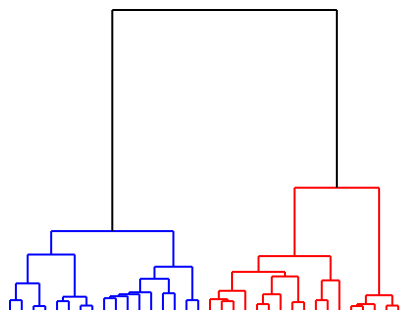

In [558]:
image = svg_dendrogram(dendrogram)
SVG(image)

##### Top-2 clusters:

In [559]:
labels, dendrogram2 = cut_straight(dendrogram, n_clusters=2, return_dendrogram=True)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [560]:
print("only", sum((labels != labels_true)), "labels are misclassified.")

only 2 labels are misclassified.


##### Top-4 clusters

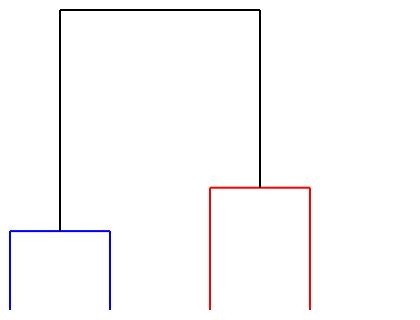

In [561]:
labels, dendrogram = cut_straight(dendrogram, n_clusters=4, return_dendrogram=True)
image = svg_dendrogram(dendrogram)
SVG(image)

In [562]:
labels

array([0, 0, 0, 0, 3, 3, 3, 0, 1, 0, 3, 0, 0, 0, 1, 1, 3, 0, 1, 0, 1, 0,
       1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1])

In [564]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3]), array([12,  9,  8,  5], dtype=int64))

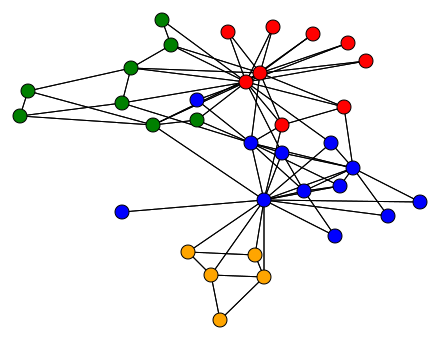

In [147]:
image = svg_graph(adjacency, position, labels=labels)
SVG(image)

## Openflights


In [260]:
graph = openflights

In [261]:
adjacency = graph.adjacency
position = graph.position
names = graph.names

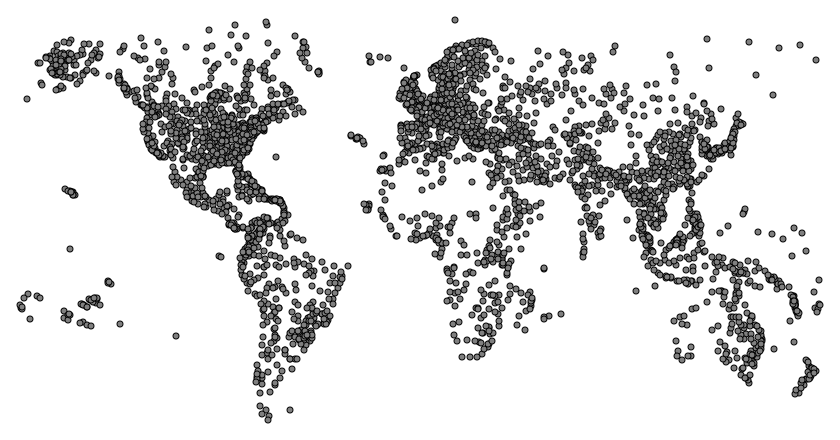

In [262]:
image = svg_graph(adjacency, position, width=800, height=400,
                  node_size=3, display_edges=False)
SVG(image)

## To do

* Display the same world map with the top-10 clusters found by Paris.
* Display the aggregate dendrogram formed by the top-50 clusters found by Paris, with the name of the top airport  (in traffic) of each cluster. <br>**Hint:** Use the parameters ``rotate``, ``n_clusters``, ``scale`` of ``svg_dendrogram`` for better visualization of the dendrogram.

#### Top-10 clusters found by Paris

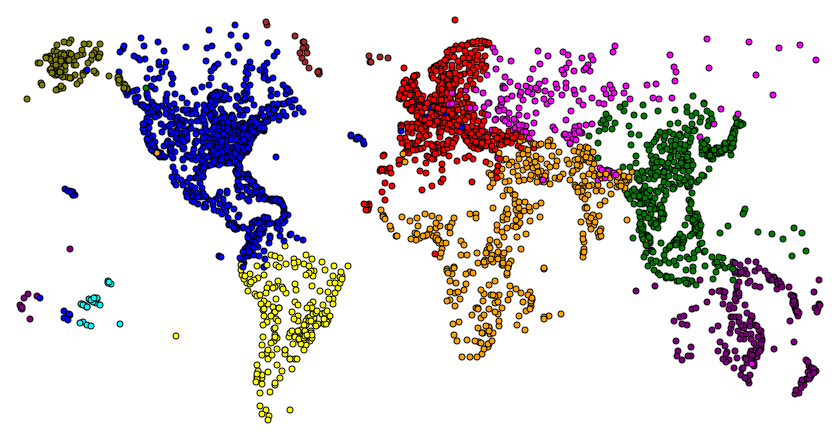

In [263]:
paris = Paris()
dendrogram = paris.fit_transform(adjacency)
labels, dendrogram = cut_straight(dendrogram, n_clusters=10, return_dendrogram=True)

image = svg_graph(adjacency, position, width=800, height=400,
                  node_size=3, display_edges=False, labels=labels)
SVG(image)

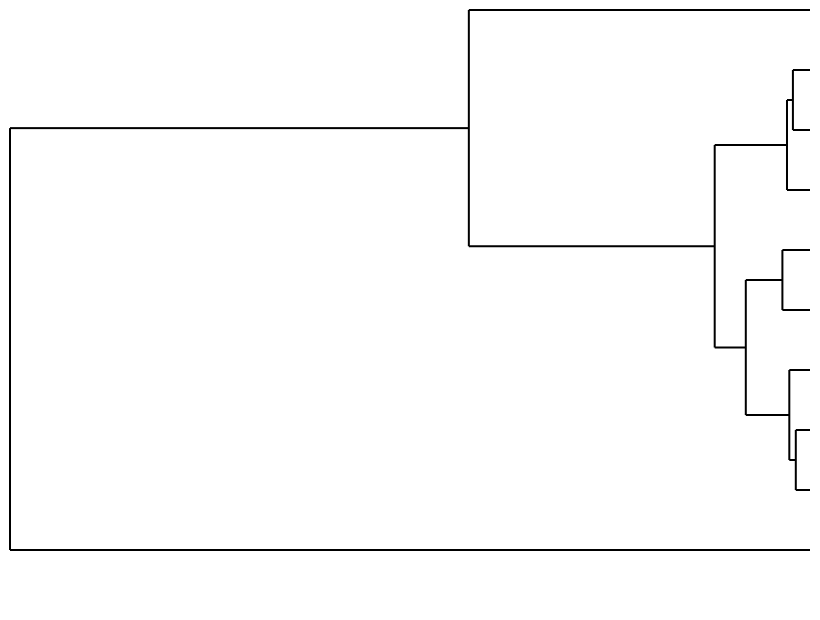

In [264]:
image = svg_dendrogram(dendrogram, n_clusters=10, rotate=True, scale=2)
SVG(image)

#### Top-50 clusters with top airports

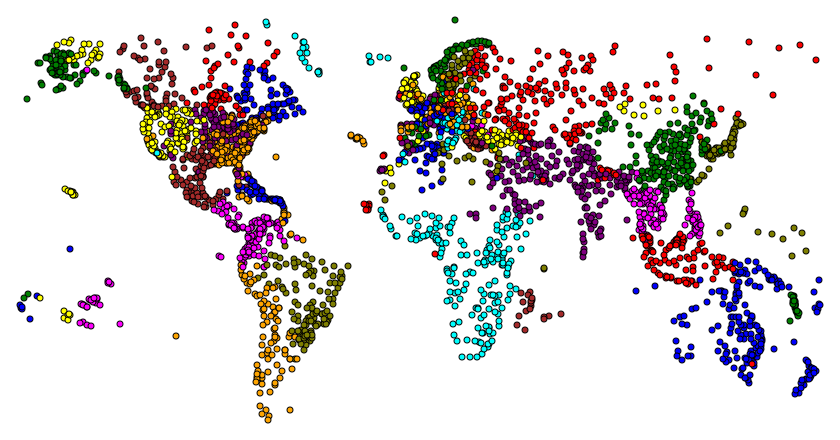

In [265]:
paris = Paris()
dendrogram = paris.fit_transform(adjacency)
labels, dendrogram = cut_straight(dendrogram, n_clusters=50, return_dendrogram=True)

image = svg_graph(adjacency, position, width=800, height=400,
                  node_size=3, display_edges=False, labels=labels)
SVG(image)

In [336]:
weights = adjacency.dot(np.ones(adjacency.shape[0]))
membership = membership_matrix(labels)
weightsPerLabel = sparse.diags(weights).dot(membership)

top_airports = np.array(weightsPerLabel.argmax(axis=0)).ravel()

In [345]:
names50 = names[top_airports[:50]]

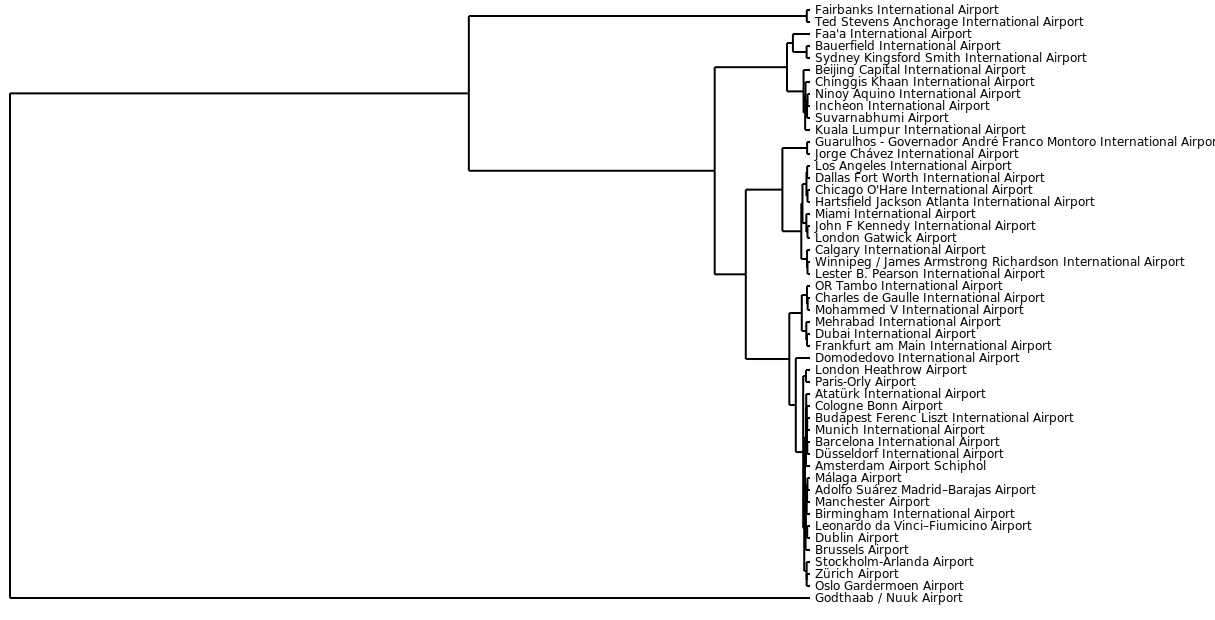

In [346]:
image = svg_dendrogram(dendrogram, n_clusters=50, rotate=True, scale=2, names=names50)
SVG(image)

## 2. Directed graphs

## Wikipedia Vitals

In [347]:
graph = wikivitals

In [348]:
adjacency = graph.adjacency
names = graph.names

In [349]:
names[:25]

array(['The arts', 'Art', 'Architecture', 'Sacred architecture',
       'Architectural drawing', 'Architectural theory',
       'Proportion (architecture)', 'Landscape architecture',
       'Ancient Egyptian architecture', 'Ancient Greek architecture',
       'Ancient Roman architecture', 'Baroque architecture',
       'Byzantine architecture', 'Chinese architecture',
       'Gothic architecture', 'Architecture of India',
       'Islamic architecture', 'Megalith', 'Mesoamerican architecture',
       'Architecture of Mesopotamia', 'Modern architecture',
       'Neoclassical architecture', 'Renaissance architecture',
       'Romanesque architecture', 'Acropolis of Athens'], dtype='<U62')

## To do

* Cluster the graph by the Paris algorithm.
* Give the size and top-5 articles of each of the top-25 clusters found by Paris.
* Display the aggregate dendrogram formed by the top-25 clusters, with the name of the top article of each cluster.

**Hint:** Use Personalized PageRank to get the top nodes of a cluster.

#### Cluster the graph

In [362]:
paris = Paris()
dendrogram = paris.fit_transform(adjacency)

In [363]:
### threshold: cuts the tree at a certain height = threshold
labels, dendrogram = cut_straight(dendrogram, threshold=1e-5 , return_dendrogram=True) #n_clusters=1000
np.unique(labels)

array([    0,     1,     2, ..., 10009, 10010, 10011])

#### Size and top-5 articles of the top-25 clusters

In [240]:
labels25, dendrogram25 = cut_straight(dendrogram, n_clusters=25, return_dendrogram=True)

In [380]:
degrees = adjacency.dot(np.ones(adjacency.shape[0]))
membership = membership_matrix(labels25)
degreesPerLabel = sparse.diags(degrees).dot(membership)
topInEachCluster25 = np.array(degreesPerLabel.argmax(axis=0)).ravel()

**The sizes of the clusters:**

In [384]:
membership.sum(axis=0)

matrix([[1210,  838,  660,  606,  601,  597,  564,  494,  448,  400,
          363,  343,  337,  292,  260,  256,  253,  248,  241,  239,
          191,  188,  167,  157,   59]], dtype=int32)

**Top 5 in each cluster:**

In [487]:
topInEachCluster25

array([3765, 3968, 2709, 2139, 2722, 2569, 6857, 9831, 2144, 1505, 2811,
       2464, 2458, 2788, 2774, 9034, 3671, 3893, 2191, 5794, 3213, 3335,
       2648, 6656, 2741])

In [479]:
xAdjacency = adjacency.copy()
top5in25 = np.zeros((5, 25), dtype=int)

membership = membership_matrix(labels25)
for k in range(5):
    degrees = xAdjacency.dot(np.ones(xAdjacency.shape[0]))
    degreesPerLabel = sparse.diags(degrees).dot(membership)
    topInEachCluster25 = np.array(degreesPerLabel.argmax(axis=0)).ravel()
    top5in25[k] = topInEachCluster25
    for i in range(25):
        membership[topInEachCluster25[i], i] = False

In [483]:
for k in range(25):
    print("top 5 pages in cluster", k+1, ":")
    for i in range(5):
        print(names[top5in25[i, k]], end=", ")
    print("\n")

top 5 pages in cluster 1 :
Modern history, Aristotle, Bertrand Russell, Augustine of Hippo, Plato, 

top 5 pages in cluster 2 :
History of art, History of science, History of chemistry, History of Germany, History of technology, 

top 5 pages in cluster 3 :
Czech Republic, Middle age, Political philosophy, Water, Winston Churchill, 

top 5 pages in cluster 4 :
Europe, Africa, Asia, Americas, Köppen climate classification, 

top 5 pages in cluster 5 :
France, Russia, Iran, United Kingdom, Germany, 

top 5 pages in cluster 6 :
United States, England, Modernism, Siberia, Western Europe, 

top 5 pages in cluster 7 :
Belief, China, Egypt, Somalia, Chemical element, 

top 5 pages in cluster 8 :
Time zone, Andes, Himalayas, Noam Chomsky, Adam Smith, 

top 5 pages in cluster 9 :
South America, Southern United States, Sculpture, History of Earth, Socialism, 

top 5 pages in cluster 10 :
Human, Arabs, Beijing, Conscience, Isaac Newton, 

top 5 pages in cluster 11 :
Caucasus, Pakistan, Ottoman Em

Other way to do it:

USE PageRank Personalized on each class in order to get the top 5 in each cluster (use code from lab4: GraphClustering)

### Dendrogram formed by the top-25 clusters, with the name of the top article

In [488]:
degrees = adjacency.dot(np.ones(adjacency.shape[0]))
membership = membership_matrix(labels25)
degreesPerLabel = sparse.diags(degrees).dot(membership)
topInEachCluster25 = np.array(degreesPerLabel.argmax(axis=0)).ravel()

In [489]:
names[topInEachCluster25]

array(['Modern history', 'History of art', 'Czech Republic', 'Europe',
       'France', 'United States', 'Belief', 'Time zone', 'South America',
       'Human', 'Caucasus', 'Ring of Fire', 'Balkans', 'Latin America',
       'Oceania', 'Libertarianism', 'Age of Discovery',
       'Revolutions of 1989', 'Pacific Ocean', 'Pope John Paul II',
       'Jerusalem', 'History of the world', 'Central African Republic',
       'Gottfried Wilhelm Leibniz', 'Italy'], dtype='<U62')

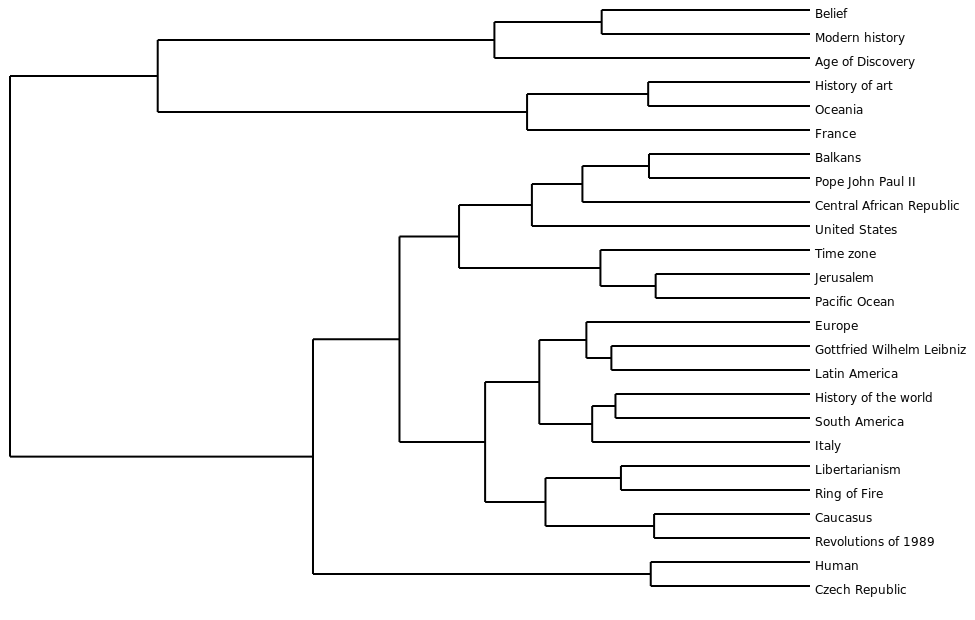

In [490]:
image = svg_dendrogram(dendrogram25, n_clusters=25, rotate=True, scale=2, names=names[topInEachCluster25])
SVG(image)

## To do

* Complete the following function that returns the nested clusters from a target node in a dendrogram.
* Give the size and top-5 articles of each nested cluster from the article **Riverboat**.

In [502]:
def get_cluster_nested(dendrogram: np.ndarray, node: int):
    '''Get nested clusters of a node.

    Parameters
    ----------
    dendrogram: 
        Dendrogram
    node:
        Target node

    Returns
    -------
    cluster_nested: list of list
        Nested clusters, expressed as a partition of the set of nodes (see the example below). 

    Example
    -------
    >>> dendrogram = np.array([[0, 1, 1, 2], [2, 3, 1, 2], [4, 5, 1, 4]])
    >>> get_cluster_nested(dendrogram, 0)
    [[0], [1], [2, 3]]
    '''
    n = dendrogram.shape[0] + 1

    cluster = {i: [i] for i in range(n)}
    cluster_nested = [[node]]
    cluster_index = node

    for t in range(n - 1):
        i = int(dendrogram[t][0])
        j = int(dendrogram[t][1])
        # to be completed
        if cluster_index == i:
            cluster_nested.append(cluster[j])
            cluster_index = n + t
        elif cluster_index == j:
            cluster_nested.append(cluster[i])
            cluster_index = n + t
        cluster[n + t] = cluster.pop(i) + cluster.pop(j)

    return cluster_nested

In [506]:
dendrogramy = np.array([[0, 1, 1, 2], [2, 3, 1, 2], [4, 5, 1, 4]])
get_cluster_nested(dendrogramy, 2)

[[2], [3], [0, 1]]

In [496]:
node = 10000 #try other numbers

In [497]:
names[node]

'Riverboat'

In [507]:
paris = Paris()
dendrogram = paris.fit_transform(adjacency)

cluster_nested = get_cluster_nested(dendrogram, node)

In [508]:
for i in range(len(cluster_nested)):
    print(i, "has:", names[cluster_nested[i]])

0 has: ['Riverboat']
1 has: ['Tanker (ship)' 'Merchant ship' 'Passenger ship' 'Freight transport']
2 has: ['Cargo ship']
3 has: ['Fishing vessel']
4 has: ['Barge']
5 has: ['Ferry' 'Bass Strait' 'Murray River']
6 has: ['Ship']
7 has: ['Submarine' 'Stealth technology' 'Warship' 'Naval architecture'
 'Aircraft carrier' 'Battleship' 'Arapaima' 'Torpedo' 'Naval mine'
 'Maritime history' 'Naval warfare']
8 has: ['Wind' 'Lift (force)' 'Sail' 'Sailing ship' 'Ship of the line' 'Sailing'
 'Galley']
9 has: ['Vehicle' 'Van' 'Four-stroke engine' 'Ambulance' 'Cargo' 'Truck' 'Car'
 'Karl Benz' 'Driving' 'Clutch' 'Motorcycle' 'Tire' 'Wheel'
 'Bearing (mechanical)' 'Yo-yo' 'Axle' 'Steam engine' 'Steamboat'
 'Gas turbine' 'Thermodynamic cycle' 'Steam turbine' 'Diesel engine'
 'Aircraft engine' 'Turbine' 'Internal combustion engine' 'Gear'
 'Mechanization' 'Engine' 'Simple machine' 'Screw (simple machine)'
 'Archimedes screw' 'Inclined plane' 'Wheel and axle' 'Lever' 'Pulley'
 'Machine' 'Utopia (book)' '

Sizes of each cluster forming the nested Cluster of 'Riverboat'

In [512]:
for level in cluster_nested:
    print(len(level))

1
4
1
1
1
3
1
11
7
89
69
448
59
1055
1210
2266
1060
3726


In [515]:
levels = len(cluster_nested)-1
print("Riverboat's nested cluster has", levels, "levels.")

Riverboat's nested cluster has 17 levels.


## 3. Bipartite graphs

## Cinema

In [516]:
graph = cinema

In [517]:
biadjacency = graph.biadjacency
movies = graph.names_row
actors = graph.names_col

## To do

* Get the hierarchy of actors and the hierarchy of movies by the Paris algorithm. 
* Give the size and top-3 movies of each of the top-20 clusters of movies.
* Give the size and top-3 actors of each of the top-20 clusters of actors.
* Give the size and top-3 actors of each nested cluster of **Catherine Deneuve**. 

**Hint:** Use Personalized BiPageRank to get the top nodes of a cluster.

In [518]:
biparis = BiParis()

In [519]:
biparis.fit(biadjacency)

BiParis(weights='degree', reorder=True)

#### Hierarchy of movies and actors, given by BiParis

In [569]:
dendrogram_movies = biparis.dendrogram_row_ # same as dendrogram_
#image = svg_dendrogram(dendrogram_movies, rotate=True, scale=2)
#SVG(image)

In [570]:
dendrogram_actors = biparis.dendrogram_col_

#### Top-3 movies of each of the top-20 clusters

#### Top-3 actors of each of the top-20 clusters

#### Top-3 actors of each nested cluster of 'Catherine Deneuve'

In [529]:
deneuve = 2173

In [530]:
actors[deneuve]

'Catherine Deneuve'

In [571]:
get_cluster_nested(dendrogram_actors, deneuve)

[[2173],
 [4172],
 [11932, 2873, 35816, 35449, 31840],
 [29052,
  23049,
  7776,
  22761,
  22288,
  21047,
  40349,
  3226,
  9587,
  432,
  3225,
  13887],
 [36236,
  42992,
  29733,
  35473,
  16734,
  26911,
  24063,
  44244,
  19833,
  31390,
  640,
  36523,
  10392,
  13785,
  10393,
  38376,
  4404,
  32303,
  17353,
  29643,
  10796,
  16576,
  28644,
  27411,
  24402],
 [10349,
  20868,
  4296,
  1447,
  2782,
  12737,
  14657,
  1543,
  1544,
  1540,
  33133,
  42192,
  36919,
  12545,
  1545,
  8971],
 [5305,
  3691,
  34000,
  22433,
  22434,
  20568,
  20569,
  2233,
  27949,
  7774,
  17770,
  635,
  35641,
  34087,
  44401,
  35044,
  23800,
  44555,
  32813,
  32812,
  32811,
  31404,
  31403,
  44449,
  44394,
  25701,
  44568,
  44567,
  44324,
  39247,
  44326,
  44325,
  44323,
  44322,
  34419,
  33027,
  10729,
  3690,
  28732,
  22853,
  29242,
  29243,
  16078,
  23890,
  24991,
  812,
  15507,
  15508,
  1904,
  16577,
  34237,
  44086,
  29051,
  7965,
  17470

In [573]:
actors[4172]

'Michel Piccoli'